 Toatal employees: 6704
    Age  Gender Education Level              Job Title  Years of Experience  \
0  32.0    Male      Bachelor's      Software Engineer                  5.0   
1  28.0  Female        Master's           Data Analyst                  3.0   
2  45.0    Male             PhD         Senior Manager                 15.0   
3  36.0  Female      Bachelor's        Sales Associate                  7.0   
4  52.0    Male        Master's               Director                 20.0   
5  29.0    Male      Bachelor's      Marketing Analyst                  2.0   
6  42.0  Female        Master's        Product Manager                 12.0   
7  31.0    Male      Bachelor's          Sales Manager                  4.0   
8  26.0  Female      Bachelor's  Marketing Coordinator                  1.0   
9  38.0    Male             PhD       Senior Scientist                 10.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  
5   55000.0  
6  12000

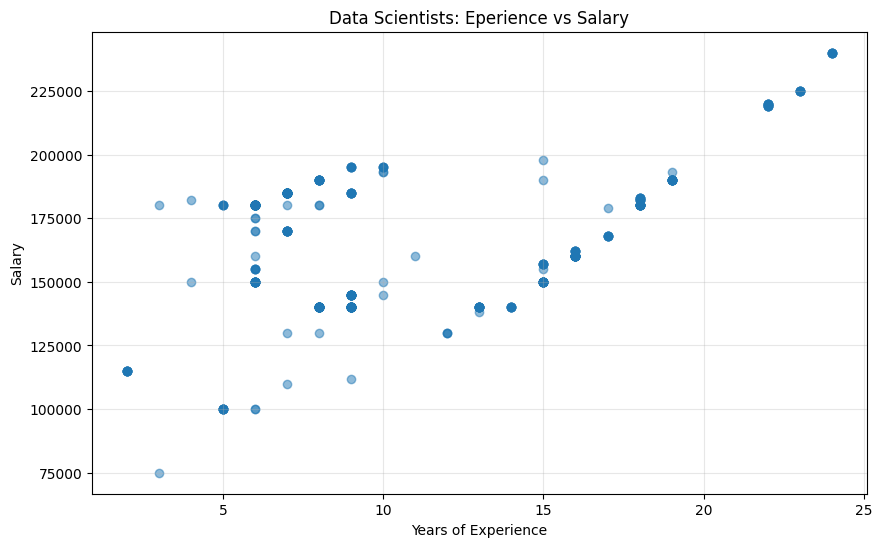

            Job Title     avg_salary  avg_experience  count
0      Data Scientist  166105.960265       11.143488    453
1        Data Analyst  125090.909091        4.969697    363
2   Software Engineer  113243.243243        4.449807    518
3  Software Developer   64680.000000        3.200000    125


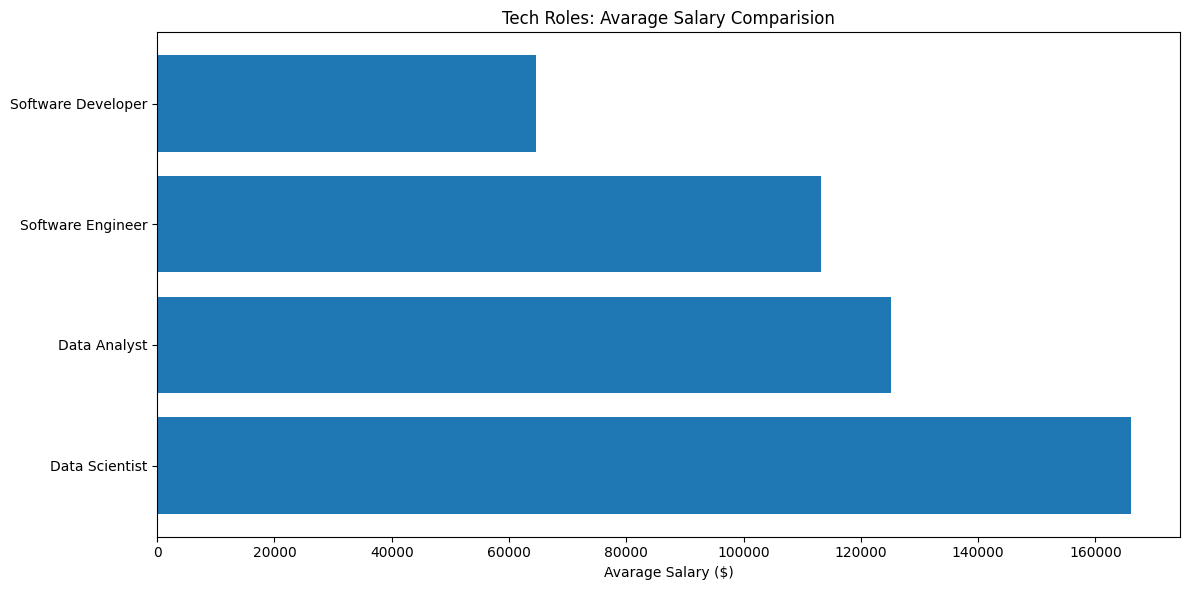

     Education Level     avg_salary  count
0         Bachelor's  183571.428571      7
1           Master's  171937.500000     80
2                PhD  166593.939394    330
3  Bachelor's Degree  150000.000000      1
4    Master's Degree  145142.857143     35
   Gender     avg_salary  count
0    None            NaN      2
1  Female  107888.998672   3014
2    Male  121389.870915   3674
3   Other  125869.857143     14
Data Scientist Salaries by gender:
   Gender     avg_salary  count
0  Female  163202.970297    202
1    Male  168442.231076    251
  experience_bracket     avg_salary  count
0          0-4 years   63409.500623   2407
1          5-9 years  120019.156892   1997
2        10-14 years  153000.251577   1268
3        15-19 years  179408.146409    724
4          20+ years  185621.750820    308


In [3]:
import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt
import seaborn as sns

# Load the full dataset
df = pd.read_csv('Salary_Data.csv')
print(f" Toatal employees: {len(df)}")
print(df.head(10))

# Setup SQL
conn = sqlite3.connect(":memory:")
df.to_sql('employees', conn, index= False)

# All about Data Scientists
data_scientists = pd.read_sql_query("""
    SELECT *
    FROM employees 
    WHERE `Job Title` = 'Data Scientist'
""", conn)

print(f"Total Data Scientists: {len(data_scientists)}")
print(f"Average DS Salary: ${data_scientists['Salary'].mean():,.0f}")
print(f"Salary Range: ${data_scientists['Salary'].min():,.0f} - ${data_scientists['Salary'].max():,.0f}")

# Experience vs Salary for Data Scientists
plt.figure(figsize=(10, 6))
plt.scatter(data_scientists['Years of Experience'], data_scientists['Salary'], alpha=0.5)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Data Scientists: Eperience vs Salary')
plt.grid(True, alpha=0.3)
plt.show()

# Education impact on DS salary
# Tech roles comparison
tech_roles = pd.read_sql_query("""
    SELECT `Job Title`, 
           AVG(Salary) as avg_salary,
           AVG(`Years of Experience`) as avg_experience,
           COUNT(*) as count
    FROM employees 
    WHERE `Job Title` IN ('Data Scientist', 'Software Engineer', 'Data Analyst', 
                          'Software Developer', 'Data Engineer')
    GROUP BY `Job Title`
    ORDER BY avg_salary DESC
""", conn)

print(tech_roles)

#visualize
plt.figure(figsize=(12,6))
plt.barh(tech_roles['Job Title'], tech_roles['avg_salary'])
plt.xlabel('Avarage Salary ($)')
plt.title('Tech Roles: Avarage Salary Comparision')
plt.tight_layout()
plt.show()

# Education impact on DS salary
ds_by_education = pd.read_sql_query("""
    SELECT `Education Level`,
           AVG(Salary) as avg_salary,
           COUNT(*) as count
    FROM employees 
    WHERE `Job Title` = 'Data Scientist'
    GROUP BY `Education Level`
    ORDER BY avg_salary DESC
""", conn)

print(ds_by_education)

# Overall gender pay gap
 
gender_pay = pd.read_sql_query("""
    SELECT Gender,
           AVG(Salary) as avg_salary,
           COUNT(*) as count
    FROM employees 
    GROUP BY Gender
""", conn)

print(gender_pay)

# Gender pay gap for Data Scientists specifically
ds_gender = pd.read_sql_query("""
    SELECT Gender,
           AVG(Salary) as avg_salary,
           COUNT(*) as count
    FROM employees
    WHERE `Job Title`= 'Data Scientist'
    GROUP BY Gender
""", conn)
print("Data Scientist Salaries by gender:")
print(ds_gender)

# Salary growth by experience brackets
experience_brackets = pd.read_sql_query("""
    SELECT 
        CASE                                    
            WHEN `Years of Experience` < 5 THEN '0-4 years'
            WHEN `Years of Experience` < 10 THEN '5-9 years'
            WHEN `Years of Experience` < 15 THEN '10-14 years'
            WHEN `Years of Experience` < 20 THEN '15-19 years'
            ELSE '20+ years'
        END as experience_bracket,
        AVG(Salary) as avg_salary,
        COUNT(*) as count
        FROM employees
        GROUP BY experience_bracket
        ORDER BY avg_salary
    """, conn)
print(experience_brackets)